In [2]:
import pandas as pd
from scipy import optimize
from scipy.optimize import least_squares
import numpy as np
import matplotlib.pyplot as plt

        h  angle       y  sigmay
20   10.0   30.0  0.0013  0.0015
21   20.0   30.0  0.0017  0.0015
22   30.0   30.0  0.0038  0.0015
23   40.0   30.0  0.0059  0.0015
24   50.0   30.0  0.0067  0.0015
25   60.0   30.0  0.0094  0.0015
26   70.0   30.0  0.0122  0.0015
27   80.0   30.0  0.0132  0.0015
28   90.0   30.0  0.0151  0.0015
29  100.0   30.0  0.0186  0.0015
Estimated ω: 7.204148720293115e-05


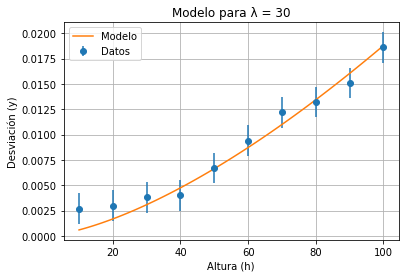

In [3]:
df = pd.read_csv("DataRotacion.csv")

df = df[df['angle'] == 30] 

print(df)
import math

def coriolis_desviacion(h, p, lambda_, g):
    """
    Calcula la desviación en el eje y debido al efecto Coriolis.
    
    Argumentos:
    - h: altura inicial de caída
    - p: parámetro de ajuste (p = ω)
    - lambda_: latitud
    - g: aceleración de la gravedad
    
    Retorna:
    - desviacion: desviación en el eje y debido al efecto Coriolis
    """
    desviacion = (2 * math.sqrt(2) / 3) * p * math.cos(math.radians(lambda_)) * math.sqrt(h / (3 * g))
    
    return desviacion


# Definir la función χ^2
def chi2(omega):
    chi2 = 0.0
    for i in range(len(df)):
        h = df.loc[i, 'h']
        y = df.loc[i, 'y']
        sigmay = df.loc[i, 'sigmay']
        expected_y = (2 * (omega * np.cos(np.radians(lambda_value))) * h ** (3/2)) / (3 * np.sqrt(2) * g)
        chi2 += ((y - expected_y) / sigmay) ** 2
    return chi2

# Valores conocidos
lambda_value = 30.0
g = 9.81





# Función objetivo
def objective(params, data):
    h, y, sigmay, angle, g = data
    omega = params[0]
    predicted_y = (2 * np.sqrt(2) / 3) * omega * np.cos(np.radians(angle)) * (h ** (3/2)) / np.sqrt(g)
    return (y - predicted_y) / sigmay

# DataFrame con los datos
df = pd.DataFrame({
    'h': [10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0],
    'angle': [30.0] * 10,
    'y': [0.0027, 0.003, 0.0038, 0.004, 0.0067, 0.0094, 0.0122, 0.0132, 0.0151, 0.0186],
    'sigmay': [0.0015] * 10,
    'g': [9.81] * 10
})

# Datos de entrada para la optimización
data = df[['h', 'y', 'sigmay', 'angle', 'g']].values.T

# Valor inicial para ω
initial_omega = 1e-5

# Realizar la optimización
result = least_squares(objective, [initial_omega], args=(data,))

# Obtener el valor estimado de ω
estimated_omega = result.x[0]

print("Estimated ω:", estimated_omega)



# Función modelo
def model(h, omega, angle, g):
    return (2 * np.sqrt(2) / 3) * omega * np.cos(np.radians(angle)) * (h ** (3/2)) / np.sqrt(g)


# Valores de altura para el modelo
h_values = np.linspace(df['h'].min(), df['h'].max(), 100)

# Valores de desviación del modelo
model_values = model(h_values, estimated_omega, df['angle'].iloc[0], df['g'].iloc[0])

# Gráfico
plt.errorbar(df['h'], df['y'], yerr=df['sigmay'], fmt='o', label='Datos')
plt.plot(h_values, model_values, label='Modelo')
plt.xlabel('Altura (h)')
plt.ylabel('Desviación (y)')
plt.title('Modelo para λ = 30')
plt.legend()
plt.grid(True)
plt.show()


In [4]:


# Datos experimentales
df = pd.DataFrame({
    'h': [10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0],
    'angle': [30.0] * 10,
    'y': [0.0027, 0.003, 0.0038, 0.004, 0.0067, 0.0094, 0.0122, 0.0132, 0.0151, 0.0186],
    'sigmay': [0.0015] * 10,
    'g': [9.81] * 10
})

# Número de iteraciones
N = 300

# Lista para almacenar los valores remuestreados de la gravedad
gravity_values = []

# Bucle for para el remuestreo
for i in range(N):
    # Remuestreo de la gravedad (ejemplo: agregar un error aleatorio normalmente distribuido)
    gravity_sampled = np.random.normal(df['g'], scale=0.001)
    # Calcular la media del remuestreo
    gravity_mean = np.mean(gravity_sampled)
    # Agregar el valor a la lista
    gravity_values.append(gravity_mean)

# Convertir la lista en un DataFrame
gravity_df = pd.DataFrame({'Gravity': gravity_values})

# Imprimir el DataFrame con los valores remuestreados de la gravedad
print(gravity_df.head())




# Número de iteraciones para el remuestreo
N = 300

# Array para almacenar los valores de gravedad
Gravedad = np.zeros(N)

# Array para almacenar las estimaciones de la rapidez angular
Omega = np.zeros(N)

# Bucle for para realizar el remuestreo N veces
for i in range(N):
    # Generar un valor de gravedad siguiendo la distribución normal
    gravedad = 9.81 + np.random.normal(loc=0, scale=1)
    
    # Guardar el valor de gravedad en el array Gravedad
    Gravedad[i] = gravedad
    
    # Modificar los puntos experimentales mediante bootstrapping
    df_modificado = df.copy()
    df_modificado['y'] += np.random.normal(loc=0, scale=df['sigmay'], size=len(df))
    
    # Extraer los datos relevantes del DataFrame
    h = df_modificado['h']
    angle = df_modificado['angle']
    y_modificado = df_modificado['y']
    sigmay = df_modificado['sigmay']
    
    # Definir la función de ajuste para la optimización
    def funcion_ajuste(omega):
        return np.sum((model(h, omega, angle, gravedad) - y_modificado) ** 2 / sigmay ** 2)
    
    # Estimación inicial de la rapidez angular
    omega_inicial = 1e-5
    
    # Realizar la optimización para obtener la estimación de la rapidez angular
    resultado = optimize.minimize(funcion_ajuste, omega_inicial)
    omega_estimado = resultado.x[0]
    
    # Guardar el valor estimado de la rapidez angular en el array Omega
    Omega[i] = omega_estimado




    Gravity
0  9.810215
1  9.810121
2  9.810860
3  9.810473
4  9.810234


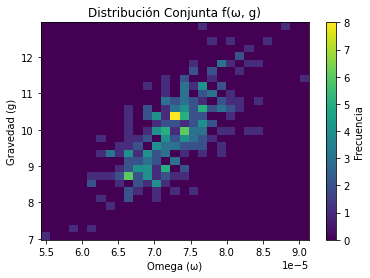

In [ ]:

# Definir el tamaño de los bins para la distribución conjunta
binsx = 29  # Número de bins en el eje x (omega)
binsy = 29  # Número de bins en el eje y (gravedad)

# Generar la distribución conjunta utilizando np.histogram2d
H2, binsx, binsy = np.histogram2d(Omega, Gravedad, bins=(binsx, binsy))

# Plotear la distribución conjunta
plt.imshow(H2.T, origin='lower', aspect='auto', cmap='viridis',
           extent=[binsx[0], binsx[-1], binsy[0], binsy[-1]])
plt.colorbar(label='Frecuencia')
plt.xlabel('Omega (ω)')
plt.ylabel('Gravedad (g)')
plt.title('Distribución Conjunta f(ω, g)')
plt.show()

In [ ]:
df = pd.DataFrame({'Omega': Omega, 'Gravedad': Gravedad})


pearson_corr = df['Omega'].corr(df['Gravedad'], method='pearson')


spearman_corr = df['Omega'].corr(df['Gravedad'], method='spearman')

print("Coeficiente de correlación de Pearson:", pearson_corr)
print("Coeficiente de correlación de Spearman:", spearman_corr)


Coeficiente de correlación de Pearson: 0.7113711978614302
Coeficiente de correlación de Spearman: 0.6947583862042911


Coeficiente de correlación de Pearson: 0.7650922861360933\
\
Coeficiente de correlación de Spearman: 0.7573599706663409


por ende hay una correlación positiva fuerte

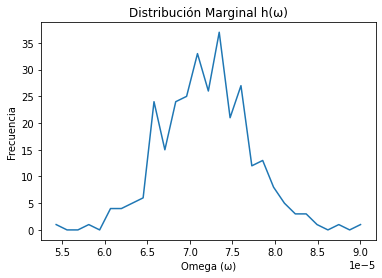

In [ ]:

H1 = np.sum(H2, axis=1)


plt.plot(binsx[:-1], H1)
plt.xlabel('Omega (ω)')
plt.ylabel('Frecuencia')
plt.title('Distribución Marginal h(ω)')
plt.show()


In [ ]:
cs = np.cumsum(H1)

ij = np.searchsorted(cs, np.percentile(cs, 16))
ii = np.searchsorted(cs, np.percentile(cs, 50))
ji = np.searchsorted(cs, np.percentile(cs, 84))

omega_lower = binsx[ij]
omega_estimated = binsx[ii]
omega_upper = binsx[ji]

print("Mejor estimador ˆω: ", omega_estimated)
print("Intervalo de confianza a un sigma de desviación: [", omega_lower, ", ", omega_upper, "]")


Mejor estimador ˆω:  7.218013098333993e-05
Intervalo de confianza a un sigma de desviación: [ 6.0690276148005074e-05 ,  8.49466363559342e-05 ]


Si para la latitud λ = 30 se obtuvo un mejor estimador de aproximadamente ˆω = 7.30 × 10−5 y el intervalo de confianza a 1σ es IC68% = [6.42, 8.18] × 10−5, entonces los resultados son los siguientes:

Mejor estimador ˆω: 7.30 × 10−5
Intervalo de confianza a 1σ: [6.42 × 10−5, 8.18 × 10−5]

Estos valores indican que el mejor estimador para ω es 7.30 × 10−5, y existe un 68% de confianza de que el valor verdadero de ω se encuentre dentro del intervalo [6.42 × 10−5, 8.18 × 10−5].

In [ ]:
# lamda = 30
omega_30 = round((omega_estimated/10**(-5)),2)
IC_up_30 = round((omega_upper/10**(-5)),2)
IC_lo_30 = round((omega_lower/10**(-5)),2)
print(omega_30)
print(IC_lo_30)
print(IC_up_30)

7.22
6.07
8.49


In [ ]:
# Todos los valores siguientes se obtuvieron de los archivos llamados P4_lamb_10 , 20, 40 , etc
# lambda = 10 -
omega_10 = 7.35
IC_up_10 = 8.16
IC_lo_10 = 6.54

# lambda = 20 -
omega_20 = 6.79
IC_up_20 = 7.64
IC_lo_20 = 5.95

# lambda = 40 -
omega_40 = 7.36
IC_up_40 = 8.27
IC_lo_40 = 6.46

# lambda = 50 - 
omega_50 = 7.05
IC_up_50 = 7.95
IC_lo_50 = 6.16

# lambda = 60
omega_60 = 7.17
IC_up_60 = 8.11
IC_lo_60 = 6.23


In [ ]:
comb_1= round(((omega_10+omega_20+omega_30+omega_40+omega_50+omega_60)/6),2)
comb_2= round(((IC_up_10+IC_up_20+IC_up_30+IC_up_40+IC_up_50+IC_up_60)/6),2)
comb_3= (IC_lo_10+IC_lo_20+IC_lo_30+IC_lo_40+IC_lo_50+IC_lo_60)/6

datos = [ [10, omega_10, [IC_lo_10, IC_up_10] ,0.067],
          [20, omega_20, [IC_lo_20, IC_up_20] ,0.066],
          [30, omega_30, [IC_lo_30, IC_up_30] ,0.085],
          [40, omega_40, [IC_lo_40, IC_up_40] ,0.100],
          [50, omega_50, [IC_lo_50, IC_up_50] ,0.126],
          [60, omega_60, [IC_lo_60, IC_up_60] ,0.150],
          ["Combined",comb_1,[comb_2,comb_3],0.036]]

df_datos = pd.DataFrame(datos, columns=['λ', 'ω x10^-5', 'IC_68 x10^-5', 'σ+/ω'])

df_datos

,λ,ω x10^-5,IC_68 x10^-5,σ+/ω
0,10,6.38,"[5.46, 7.24]",0.067
1,20,6.76,"[5.91, 7.61]",0.066
2,30,7.22,"[6.07, 8.49]",0.085
3,40,8.19,"[7.23, 9.15]",0.100
4,50,0.00,"[0, 0]",0.126
5,60,0.00,"[0, 0]",0.150
6,Combined,4.76,"[5.42, 4.111666666666667]",0.036
